<a href="https://colab.research.google.com/github/marioalejandrohernandez/AnaliticadedatosMarioAlejandro/blob/main/Actividad_5_A01708033.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente

%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
df = pd.read_excel("/content/microretailer_mit_lift_lab.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


**Aplicar métodos para reemplazar valores nulos del dataframe**

In [3]:
for columna in df.columns:
    if df[columna].dtype == 'object':
        # Si la columna es categórica, imputamos con la moda
        moda = df[columna].mode()[0]
        df[columna].fillna(moda, inplace=True)
    else:
        # Si la columna es numérica, imputamos con la mediana
        mediana = df[columna].median()
        df[columna].fillna(mediana, inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Contar los valores nulos en cada columna
nulos_por_columna = df.isnull().sum()

# Imprimir la cantidad de valores nulos por columna
print(nulos_por_columna)

# Restaurar la configuración predeterminada de Pandas si es necesario
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

_record_id                                                      0
_title                                                          0
_server_updated_at                                              0
_updated_by                                                     0
_geometry                                                       0
_latitude                                                       0
_longitude                                                      0
228_store_name                                                  0
229_store_picture                                               0
232_type_of_store                                               0
108_does_the_micro_retailer_has_a_barred_window_                0
99_does_the_micro_retailer_exhibits_products_outside_           0
102_does_the_micro_retailer_sells_fresh_products_               0
97_number_of_customers_in_store                                 0
268_number_fridges                                              0
184_store_

In [5]:

columnas_a_eliminar = ['275_platform_days_receive_money', '274_platform_fee', '273_platform_extra_charge', '271_card_fee']

df = df.drop(columnas_a_eliminar, axis=1)

total_nulos = df.isnull().sum().sum()

print(f"Total de valores nulos después de eliminar columnas: {total_nulos}")


Total de valores nulos después de eliminar columnas: 0


**Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para eliminar Outliers del dataframe**

In [6]:
df.describe()

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02
mean,19.045305,-98.218969,1.391813,1.625731,6.707602,1.690058,1.502924,1.239766,3.456140,3.652047,...,14.888889,1.052632,3.821637,28.500000,3.152047,3.187135,2.000000,2.409357,4.485380,2.363190e+09
std,0.021956,0.042889,1.733321,2.840927,16.368438,3.894622,3.523658,1.675375,2.890574,1.061483,...,4.813516,0.596688,4.374263,2.332002,8.409395,8.920568,0.108465,1.603938,10.707533,1.567505e+09
min,18.999309,-98.314273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.222304e+08
25%,19.020820,-98.250742,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.500000,...,15.000000,1.000000,3.500000,28.500000,2.000000,2.000000,2.000000,2.000000,1.000000,2.224182e+09
50%,19.043188,-98.217874,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,3.500000,...,15.000000,1.000000,3.500000,28.500000,2.000000,2.000000,2.000000,2.000000,1.000000,2.224182e+09
75%,19.068002,-98.180573,2.000000,2.000000,7.000000,2.000000,1.000000,1.000000,3.500000,3.500000,...,15.000000,1.000000,3.500000,28.500000,2.000000,2.000000,2.000000,2.000000,1.000000,2.224182e+09
max,19.075273,-98.163314,10.000000,23.000000,150.000000,50.000000,45.000000,20.000000,20.000000,7.000000,...,50.000000,7.000000,60.000000,50.000000,100.000000,100.000000,3.000000,7.000000,70.000000,2.221439e+10


In [7]:
columnns = list(df.columns)

# Ciclo for para encontrar outliers
for columna in df.columns:
    if df[columna].dtypes == 'int64' or df[columna].dtypes == 'float64':
        # Calcular cuartiles para identificar outliers en cada columna
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)

        # Calcular el IQR
        IQR = Q3 - Q1

        # Definir los límites para outliers
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        # Máscara booleana para identificar outliers
        outlier_mask = (df[columna] < lim_inf) | (df[columna] > lim_sup)

        # Reemplazar outliers por la mediana
        median = df[columna].median()
        df.loc[outlier_mask, columna] = median


df.describe()


,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.0,171.0,171.000000,171.0,...,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,1.710000e+02
mean,19.045305,-98.218969,1.187135,1.099415,3.970760,1.128655,1.0,1.0,2.684211,3.5,...,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
std,0.021956,0.042889,1.274205,1.361897,3.637108,0.740308,0.0,0.0,1.129673,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
min,18.999309,-98.314273,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000,3.5,...,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
25%,19.020820,-98.250742,0.000000,0.000000,1.000000,1.000000,1.0,1.0,2.000000,3.5,...,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
50%,19.043188,-98.217874,1.000000,1.000000,3.000000,1.000000,1.0,1.0,3.000000,3.5,...,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
75%,19.068002,-98.180573,2.000000,2.000000,6.000000,1.000000,1.0,1.0,3.000000,3.5,...,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09
max,19.075273,-98.163314,5.000000,5.000000,16.000000,3.000000,1.0,1.0,5.000000,3.5,...,15.0,1.0,3.5,28.5,2.0,2.0,2.0,2.0,1.0,2.224182e+09


**Extraer características a partir de aplicar un análisis univariado, a diferentes variables**

In [9]:
objects1 = ["251_technology_investment_customers","264_technology_budget","263_technology_secure_sales","251_technology_investment_customers","262_technology_serve_customers" ,"260_technology_scalable","250_technology_investment_operations","235_email","319_shopkeepers_last_name","318_shopkeeper_name","249_technology_training"]

Ejecutando para la variable: 251_technology_investment_customers
  251_technology_investment_customers  frequency  percentage  cumulative_perc
0               Totalmente de acuerdo        133    0.777778         0.777778
1                          De acuerdo         23    0.134503         0.912281
2            Totalmente en desacuerdo          7    0.040936         0.953216
3      Ni de acuerdo ni en desacuerdo          5    0.029240         0.982456
4                       En desacuerdo          3    0.017544         1.000000


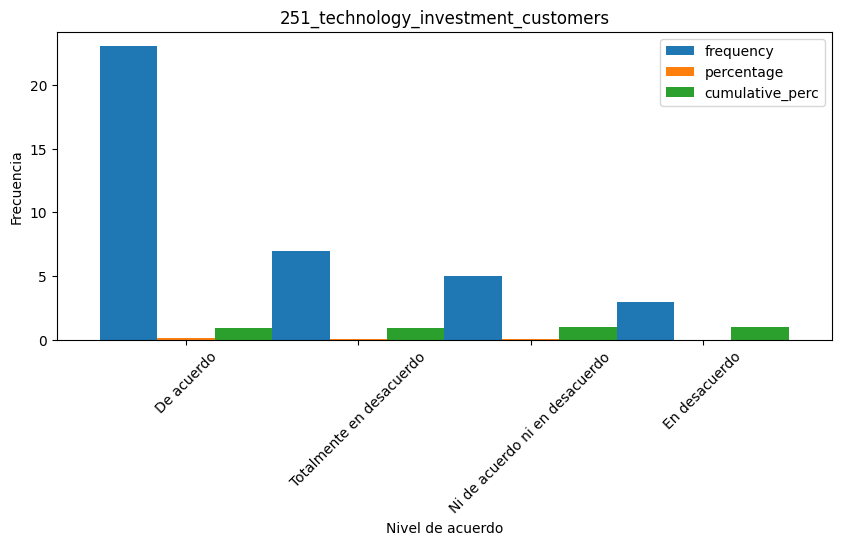

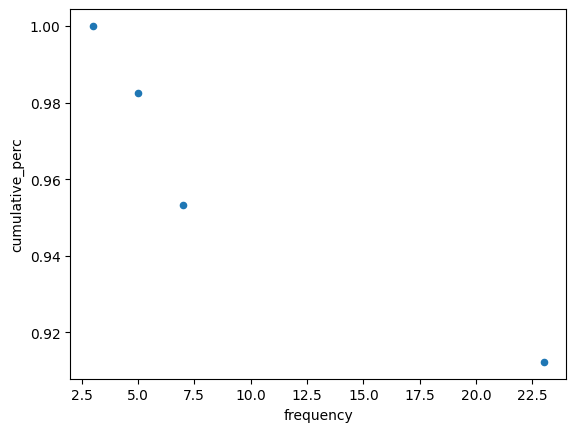

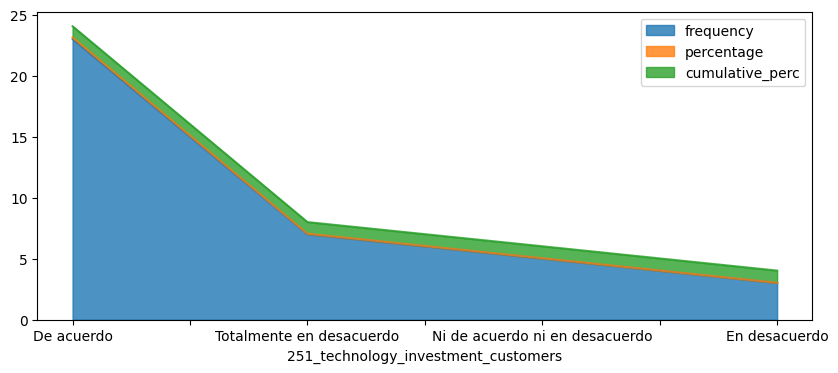

Ejecutando para la variable: 264_technology_budget
            264_technology_budget  frequency  percentage  cumulative_perc
0        Totalmente en desacuerdo        131    0.766082         0.766082
1                      De acuerdo         15    0.087719         0.853801
2                   En desacuerdo          9    0.052632         0.906433
3           Totalmente de acuerdo          9    0.052632         0.959064
4  Ni de acuerdo ni en desacuerdo          7    0.040936         1.000000


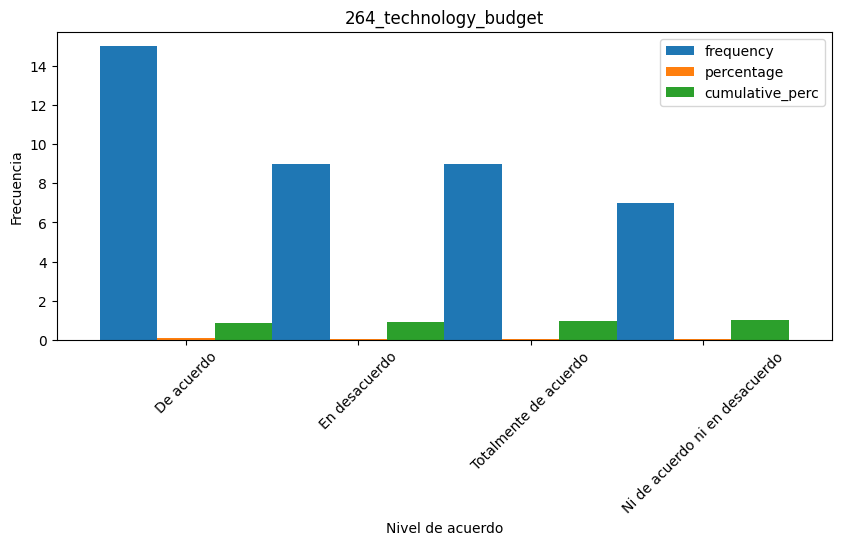

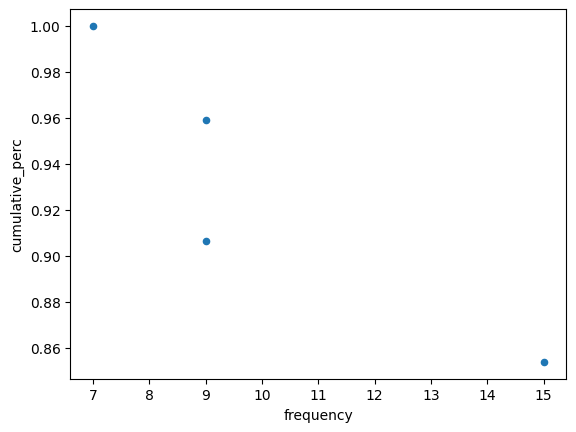

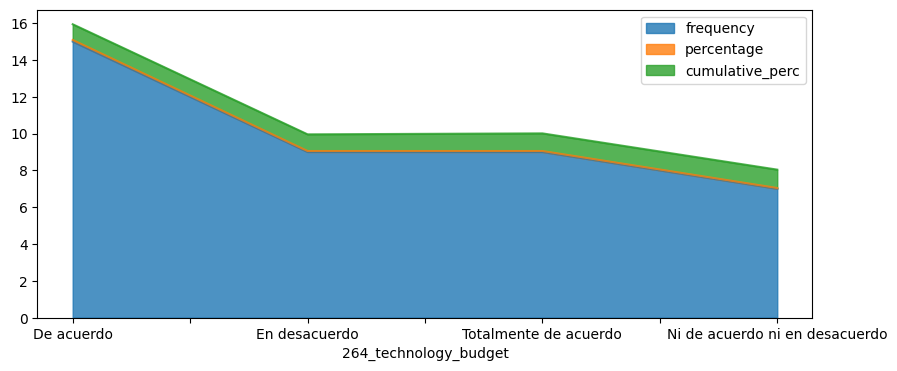

Ejecutando para la variable: 263_technology_secure_sales
      263_technology_secure_sales  frequency  percentage  cumulative_perc
0                      De acuerdo        130    0.760234         0.760234
1           Totalmente de acuerdo         14    0.081871         0.842105
2        Totalmente en desacuerdo         13    0.076023         0.918129
3  Ni de acuerdo ni en desacuerdo          8    0.046784         0.964912
4                   En desacuerdo          6    0.035088         1.000000


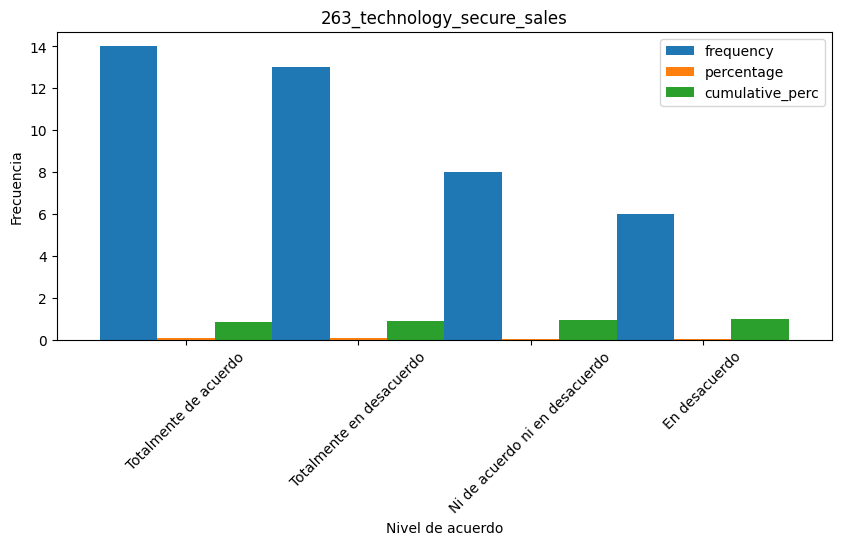

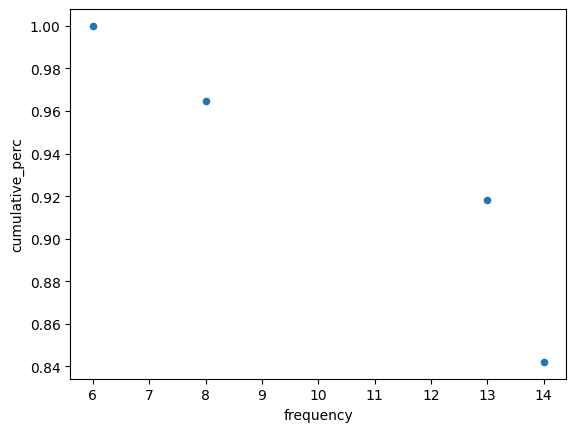

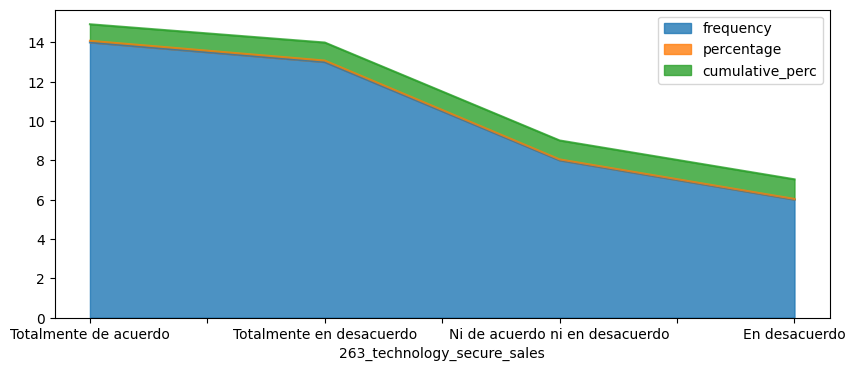

Ejecutando para la variable: 251_technology_investment_customers
  251_technology_investment_customers  frequency  percentage  cumulative_perc
0               Totalmente de acuerdo        133    0.777778         0.777778
1                          De acuerdo         23    0.134503         0.912281
2            Totalmente en desacuerdo          7    0.040936         0.953216
3      Ni de acuerdo ni en desacuerdo          5    0.029240         0.982456
4                       En desacuerdo          3    0.017544         1.000000


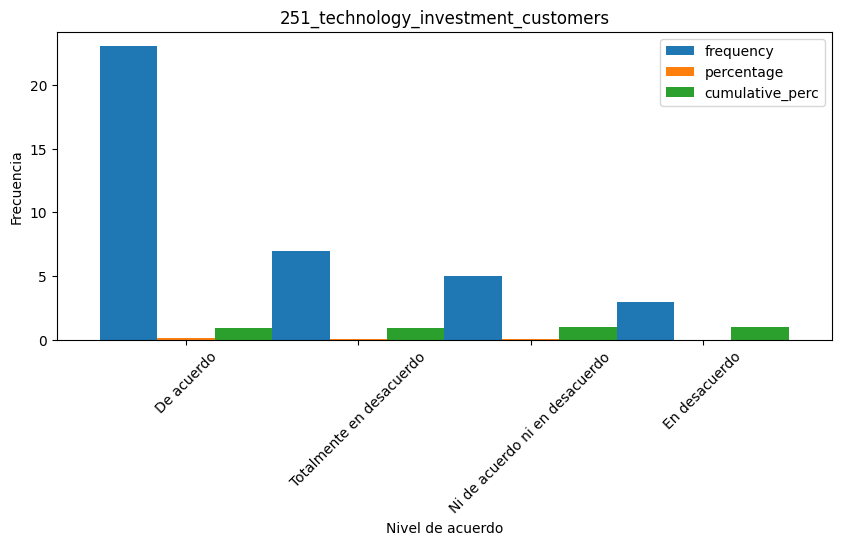

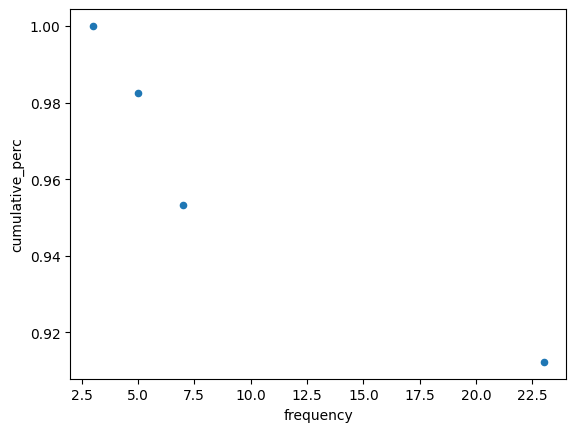

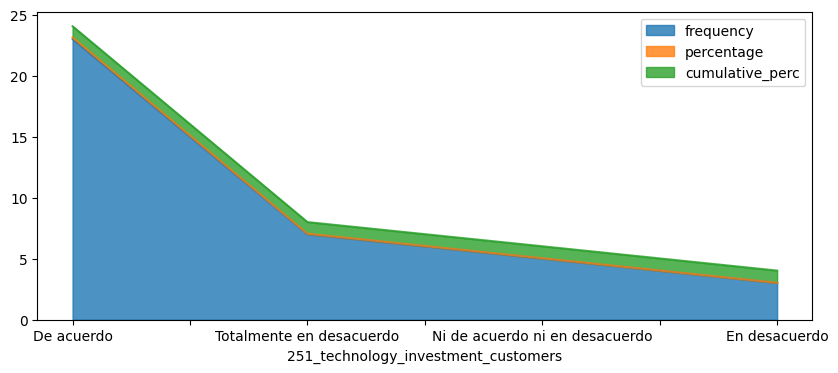

Ejecutando para la variable: 262_technology_serve_customers
   262_technology_serve_customers  frequency  percentage  cumulative_perc
0                      De acuerdo        125    0.730994         0.730994
1           Totalmente de acuerdo         20    0.116959         0.847953
2        Totalmente en desacuerdo         12    0.070175         0.918129
3  Ni de acuerdo ni en desacuerdo         11    0.064327         0.982456
4                   En desacuerdo          3    0.017544         1.000000


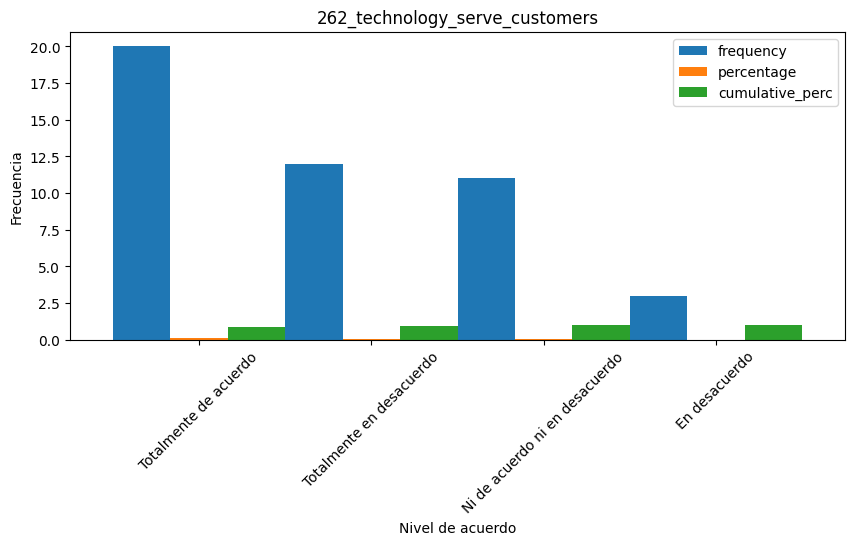

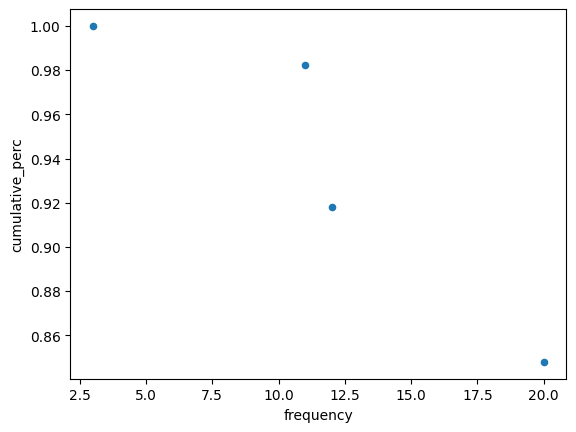

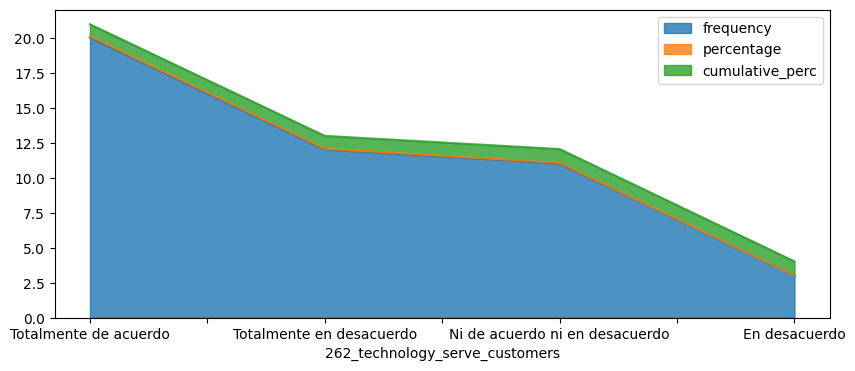

Ejecutando para la variable: 260_technology_scalable
          260_technology_scalable  frequency  percentage  cumulative_perc
0           Totalmente de acuerdo        137    0.801170         0.801170
1                      De acuerdo         14    0.081871         0.883041
2  Ni de acuerdo ni en desacuerdo          8    0.046784         0.929825
3                   En desacuerdo          6    0.035088         0.964912
4        Totalmente en desacuerdo          6    0.035088         1.000000


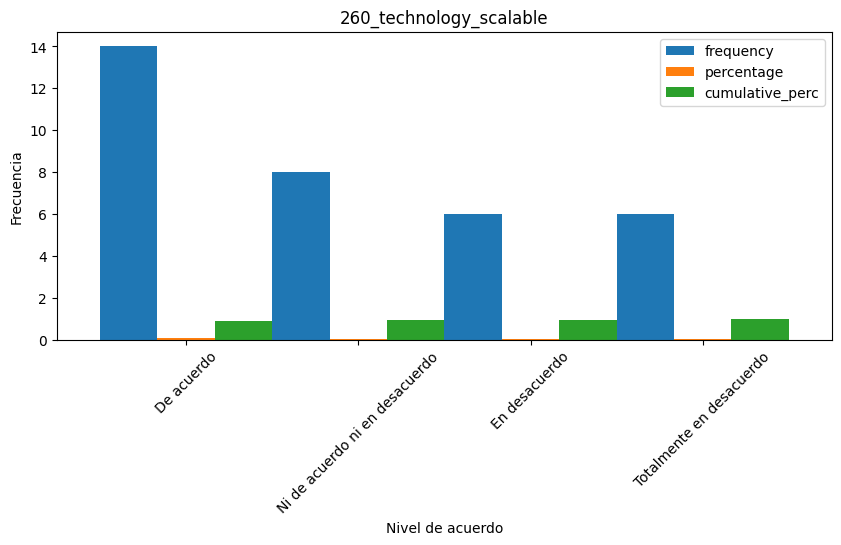

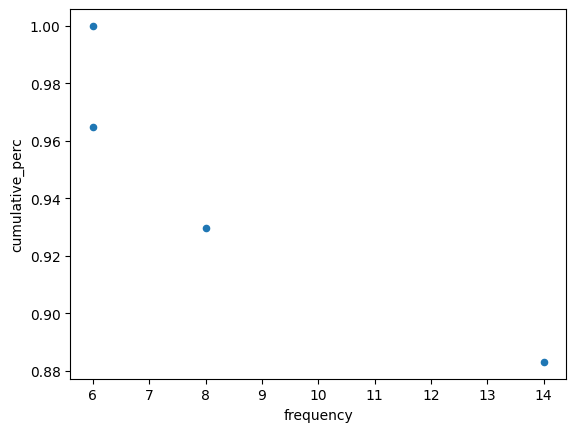

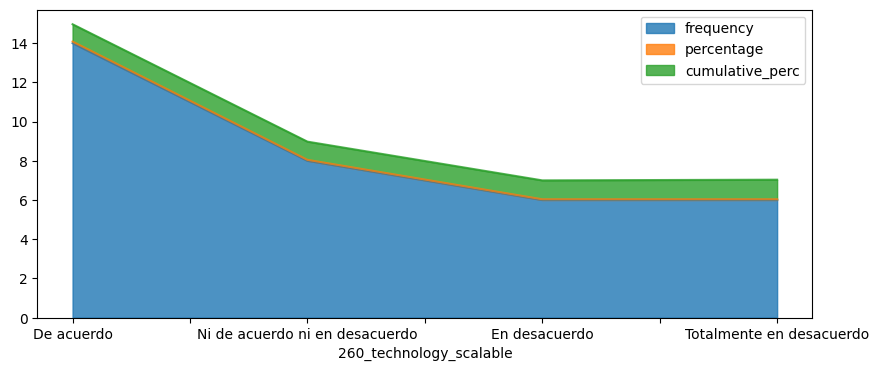

Ejecutando para la variable: 250_technology_investment_operations
  250_technology_investment_operations  frequency  percentage  cumulative_perc
0                Totalmente de acuerdo        131    0.766082         0.766082
1                           De acuerdo         20    0.116959         0.883041
2             Totalmente en desacuerdo          8    0.046784         0.929825
3                        En desacuerdo          6    0.035088         0.964912
4       Ni de acuerdo ni en desacuerdo          6    0.035088         1.000000


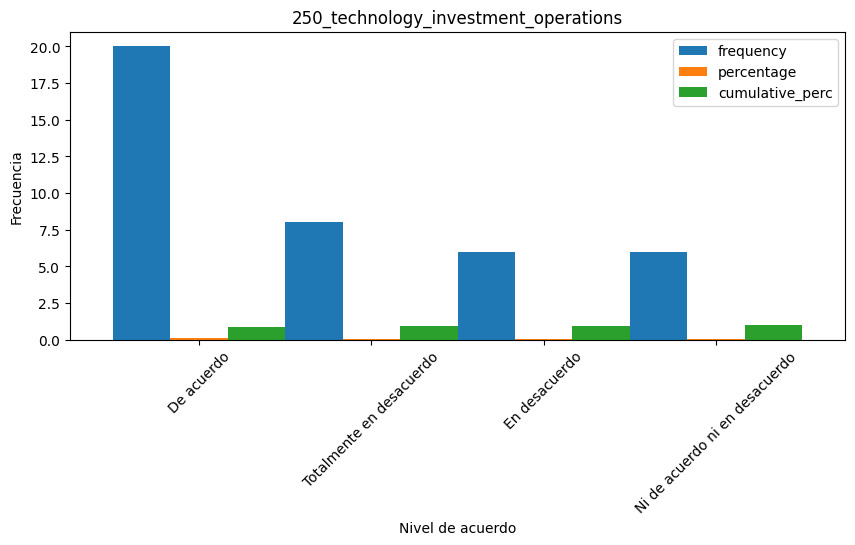

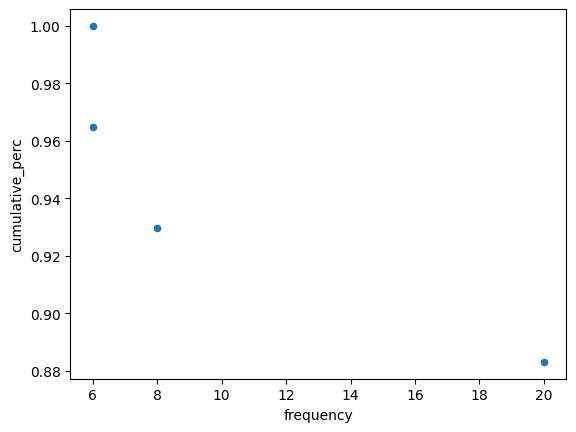

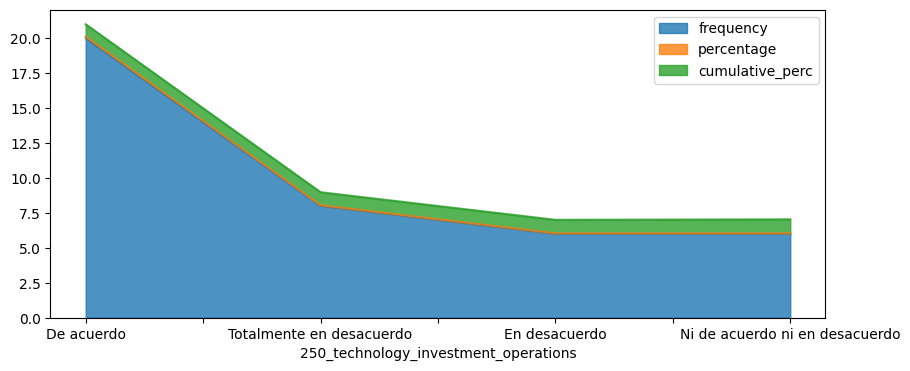

Ejecutando para la variable: 235_email
                             235_email  frequency  percentage  cumulative_perc
0               Colada2241@hotmail.com        143    0.836257         0.836257
1              jazlin_chik@hotmail.com          1    0.005848         0.842105
2                gpricardo02@gmail.com          1    0.005848         0.847953
3             teremunive27@hotmail.com          1    0.005848         0.853801
4                  lourggg@hotmail.com          1    0.005848         0.859649
5               spablom_28@hotmail.com          1    0.005848         0.865497
6               ferreambriz1@gmail.com          1    0.005848         0.871345
7             riverabrandon7@gmail.com          1    0.005848         0.877193
8         barragan_adriana@hotmail.com          1    0.005848         0.883041
9                 Jade13_4@hotmail.com          1    0.005848         0.888889
10                  Peque189@gmail.com          1    0.005848         0.894737
11           

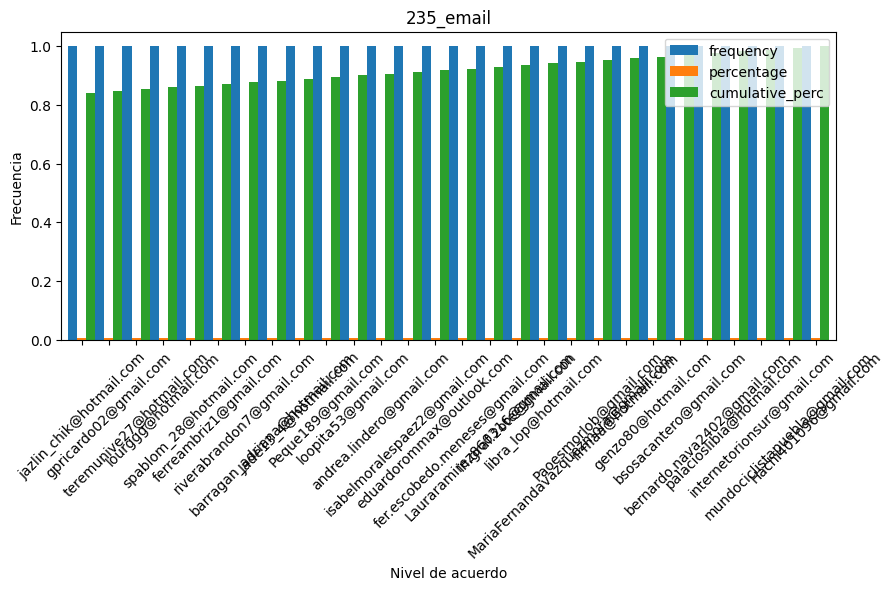

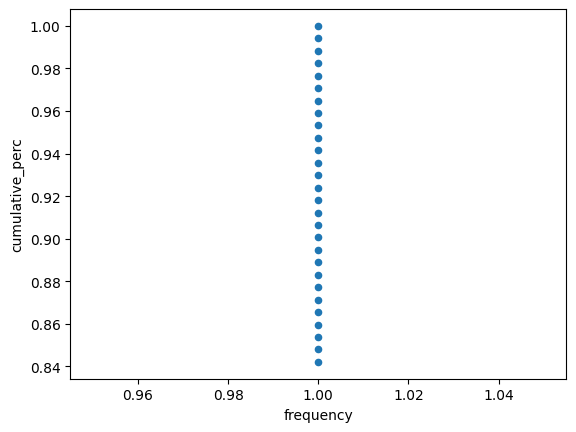

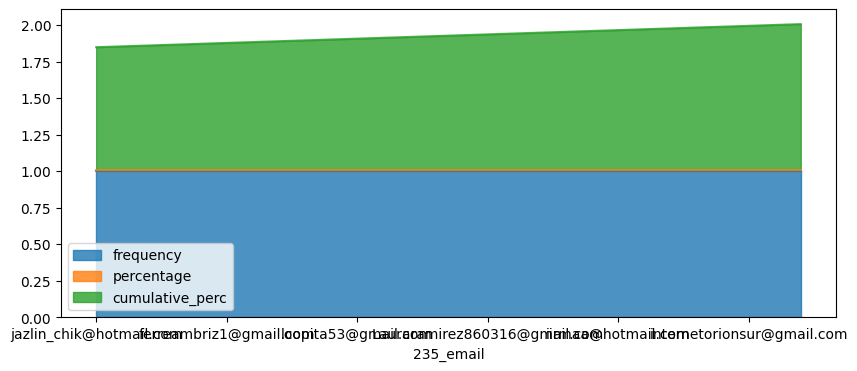

Ejecutando para la variable: 319_shopkeepers_last_name
   319_shopkeepers_last_name  frequency  percentage  cumulative_perc
0                     Aguila        126    0.736842         0.736842
1           Guerrero Herrera          1    0.005848         0.742690
2             Chavez Montoya          1    0.005848         0.748538
3                     Sorcia          1    0.005848         0.754386
4                   Guevara           1    0.005848         0.760234
5               Morales Paez          1    0.005848         0.766082
6          Lindero Palomares          1    0.005848         0.771930
7              Piña Aguilar           1    0.005848         0.777778
8                   Albarado          1    0.005848         0.783626
9             Mendez Juárez           1    0.005848         0.789474
10          Flores Contreras          1    0.005848         0.795322
11            Rivera Ibarra           1    0.005848         0.801170
12                  Escobedo          1    0.005

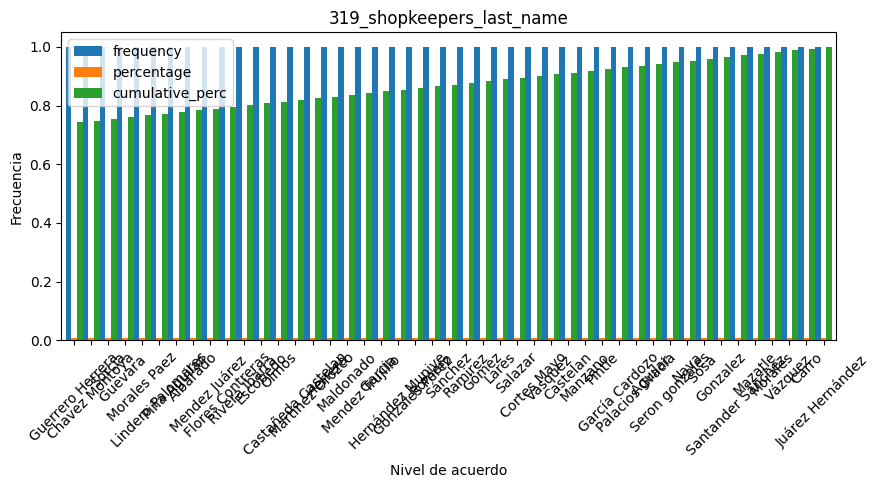

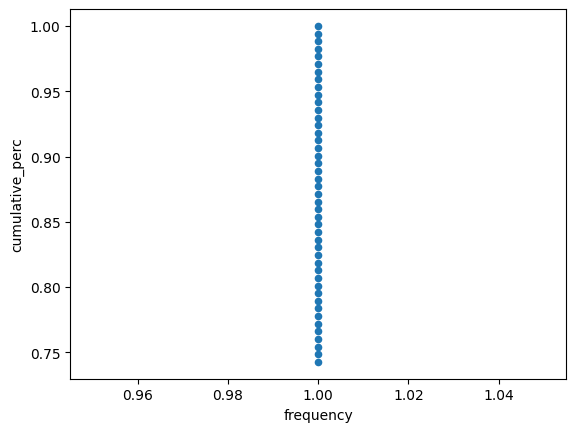

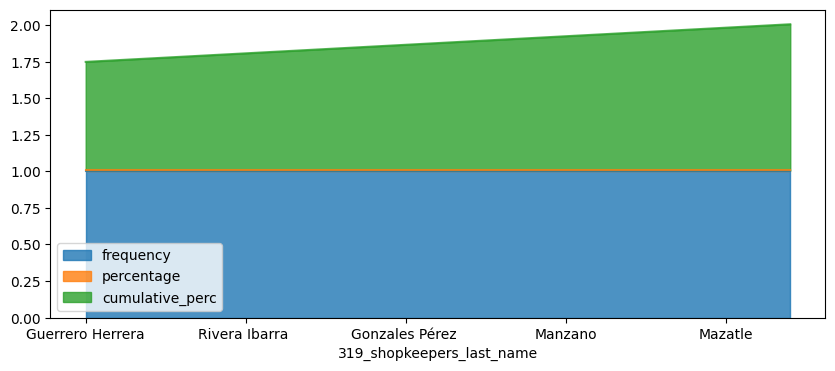

Ejecutando para la variable: 318_shopkeeper_name
       318_shopkeeper_name  frequency  percentage  cumulative_perc
0                   Andrea        125    0.730994         0.730994
1                  Andrea           2    0.011696         0.742690
2                 Fernanda          2    0.011696         0.754386
3                   Teresa          1    0.005848         0.760234
4                  Lourdes          1    0.005848         0.766082
5                  Eduardo          1    0.005848         0.771930
6                 Leticia           1    0.005848         0.777778
7                   Linda           1    0.005848         0.783626
8                    Karla          1    0.005848         0.789474
9          María Guadalupe          1    0.005848         0.795322
10  Arantza Mendez Juárez           1    0.005848         0.801170
11           Maria Antonia          1    0.005848         0.807018
12        Guillermo Carlos          1    0.005848         0.812865
13           

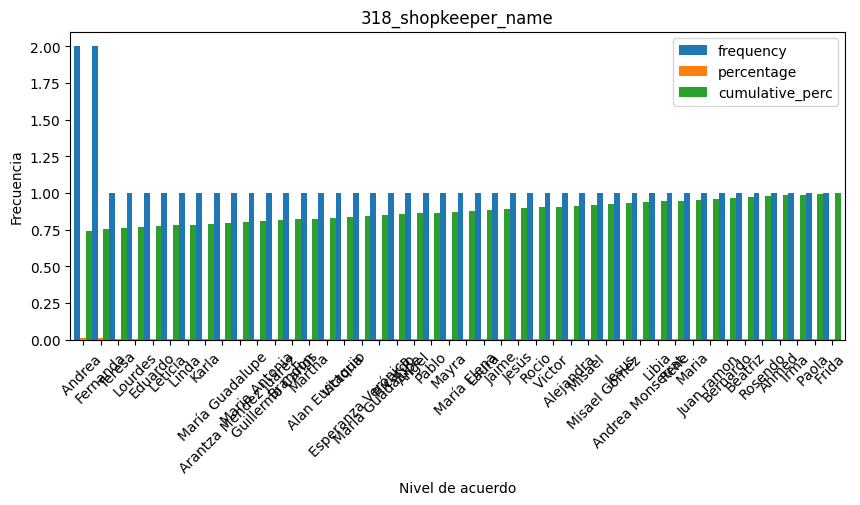

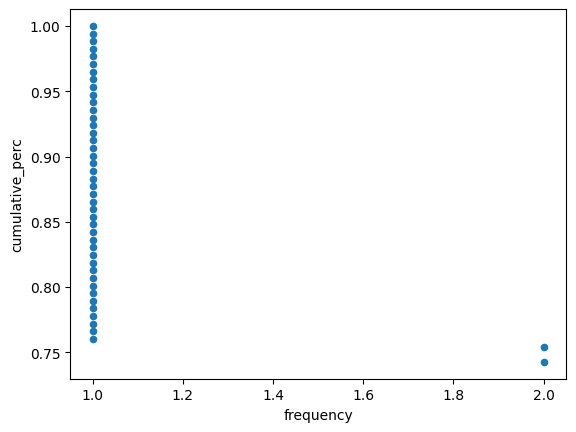

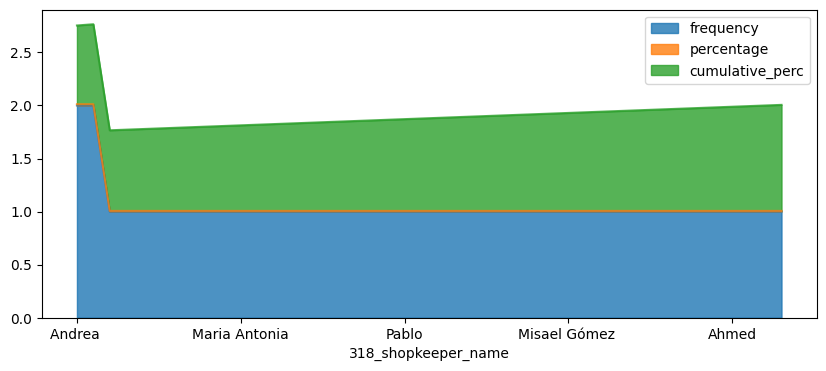

Ejecutando para la variable: 249_technology_training
          249_technology_training  frequency  percentage  cumulative_perc
0           Totalmente de acuerdo        135    0.789474         0.789474
1                      De acuerdo         21    0.122807         0.912281
2        Totalmente en desacuerdo          8    0.046784         0.959064
3  Ni de acuerdo ni en desacuerdo          6    0.035088         0.994152
4                   En desacuerdo          1    0.005848         1.000000


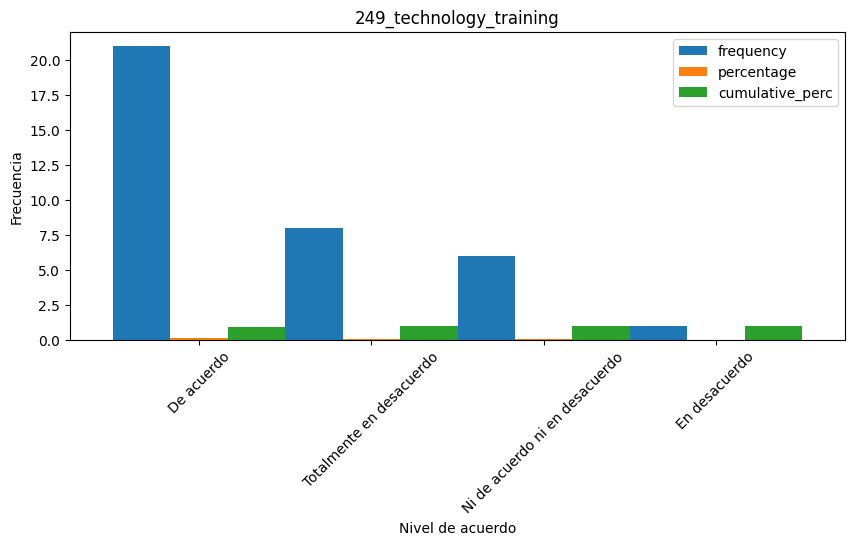

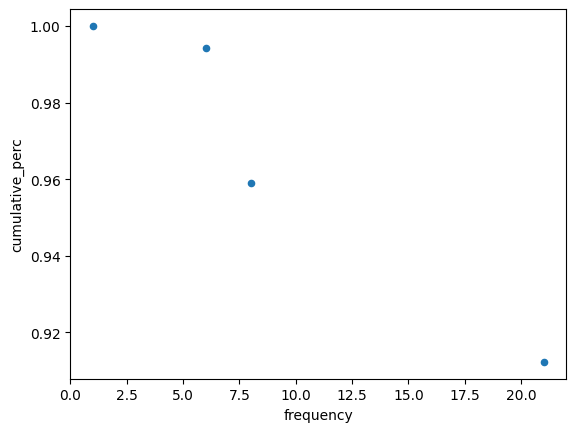

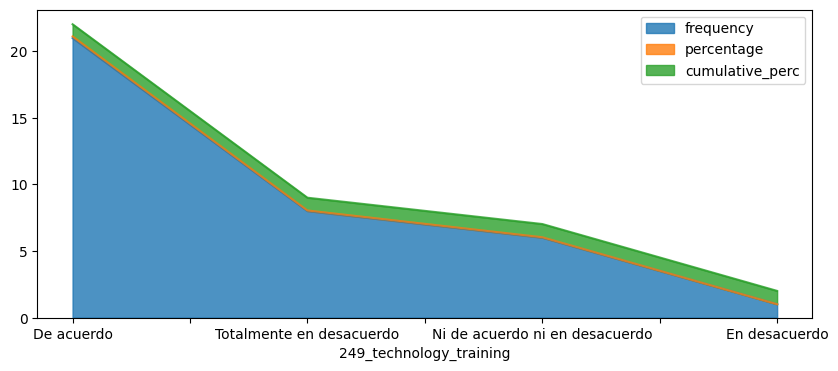

In [31]:
for variable in objects1:
    print("=" * 50)
    print(f"Ejecutando para la variable: {variable}")
    print("=" * 50)

    # Crear una tabla de frecuencia
    table1 = freq_tbl(df[variable])

    # Imprimir la tabla de frecuencia
    print(table1)

    # Filtrar la tabla de frecuencia
    filtro = table1[table1['frequency'] < 100]

    # Ajustar el índice del DataFrame filtrado
    filtro_index = filtro.set_index(variable)

    # Realizar un gráfico de barras del DataFrame filtrado
    filtro_index.plot(kind='bar', width=1, figsize=(10, 4))
    plt.title(variable)
    plt.xlabel('Nivel de acuerdo')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    # Realizar un gráfico de dispersión del DataFrame filtrado
    filtro_index.plot("frequency", "cumulative_perc", kind="scatter")

    # Realizar un gráfico de área del DataFrame filtrado
    filtro_index.plot(kind='area', figsize=(10, 4), alpha=0.8)

    # Mostrar los gráficos
    plt.show()

In [8]:
for columna in df.columns:
    if df[columna].dtypes == 'object':
        print(columna)

_record_id
_title
_server_updated_at
_updated_by
_geometry
228_store_name
229_store_picture
232_type_of_store
108_does_the_micro_retailer_has_a_barred_window_
99_does_the_micro_retailer_exhibits_products_outside_
102_does_the_micro_retailer_sells_fresh_products_
184_store_devices
pictures_of_shelves_if_possible
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz
le_comento_que_toda_esta_informacin_es_confidencial
233_date_establishment
5_change_store_space_last_year
6_change_employees_average_salary_last_year
20_reviews_finances_monthly
49_inventory_records
18_sales_records
155_sales_registers_used_for
19_tax_id
310_burnout
186_internet_connection
210_sales_channels
189_payment_methods
28_prefered_payment_method
31_different_prices_payment_method
269_cash_discount
270_card_extra_charge
30_payment_methods_large_purchases
214_customer_relationship_tools
33_credit_to_customers
35_interest_rate
38_average_margin_profits
193_sales_planning_tools
227_agreement_ecommerce_platforms
60_s

In [29]:
objects2 = ["210_sales_channels","_server_updated_at","314_reception_delivery_packages","56_procurement_changes_pandemic","214_customer_relationship_tools","313_home_deliveries","99_does_the_micro_retailer_exhibits_products_outside_","184_store_devices","210_sales_channels","31_different_prices_payment_method"]

Ejecutando para la variable: 185_place_orders_suppliers
                           185_place_orders_suppliers  frequency  percentage  \
0                                          En persona        120    0.701754   
1              Mensajería instantánea (e.g. WhatsApp)          8    0.046784   
2   En persona,Llamada telefónica,Mensajería insta...          7    0.040936   
3                                  Llamada telefónica          6    0.035088   
4   En persona,Mensajería instantánea (e.g. WhatsApp)          5    0.029240   
5                            Página web del proveedor          5    0.029240   
6                       En persona,Llamada telefónica          5    0.029240   
7   Mensaje de texto (SMS),Mensajería instantánea ...          2    0.011696   
8                 En persona,Página web del proveedor          2    0.011696   
9                              Mensaje de texto (SMS)          2    0.011696   
10  Llamada telefónica,Mensajería instantánea (e.g...          1

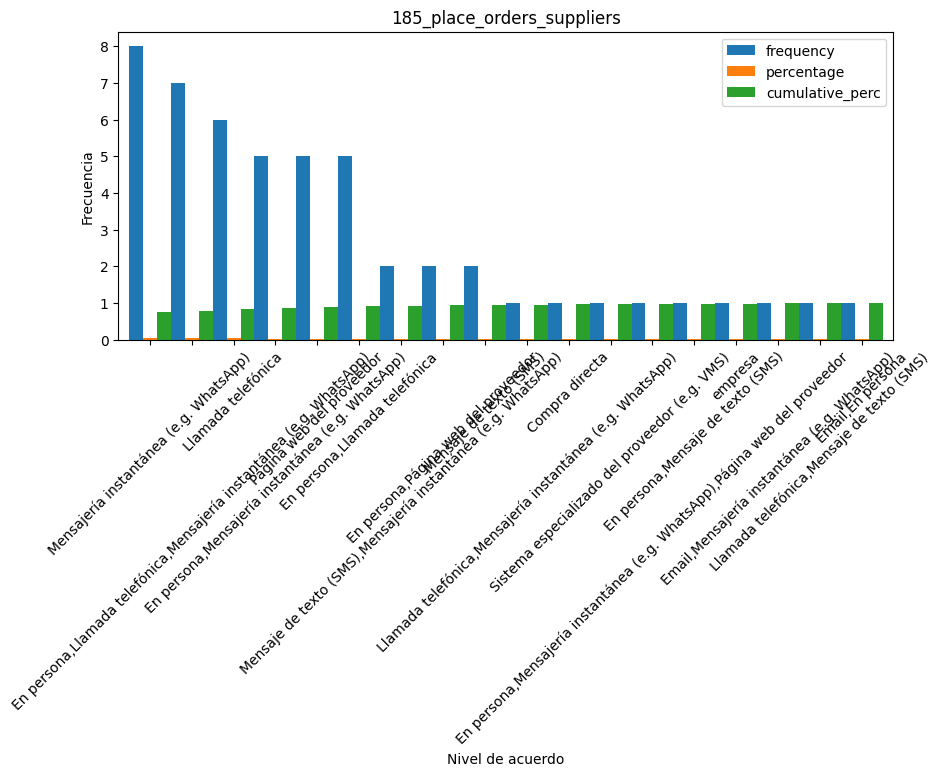

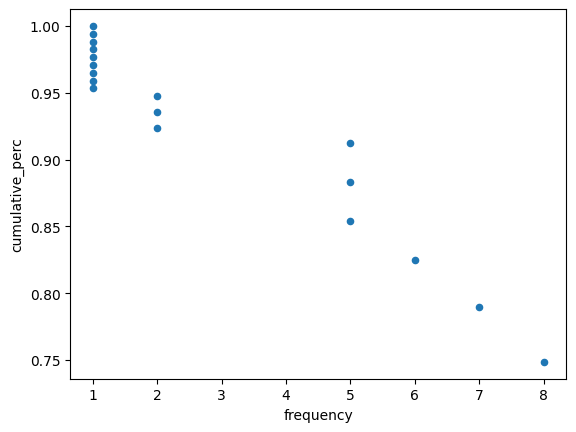

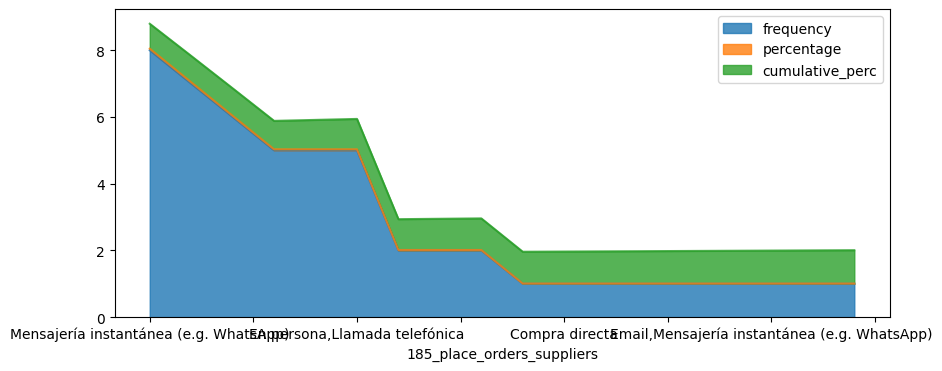

Ejecutando para la variable: _server_updated_at
          _server_updated_at  frequency  percentage  cumulative_perc
0    2022-11-09 23:13:46 UTC          3    0.017544         0.017544
1    2022-11-11 22:11:34 UTC          3    0.017544         0.035088
2    2022-11-09 23:13:47 UTC          3    0.017544         0.052632
3    2022-11-12 22:15:09 UTC          3    0.017544         0.070175
4    2022-11-09 23:20:41 UTC          2    0.011696         0.081871
..                       ...        ...         ...              ...
127  2022-11-10 17:34:43 UTC          1    0.005848         0.976608
128  2022-11-10 17:34:47 UTC          1    0.005848         0.982456
129  2022-11-10 17:39:04 UTC          1    0.005848         0.988304
130  2022-11-10 17:46:56 UTC          1    0.005848         0.994152
131  2022-11-03 16:15:13 UTC          1    0.005848         1.000000

[132 rows x 4 columns]


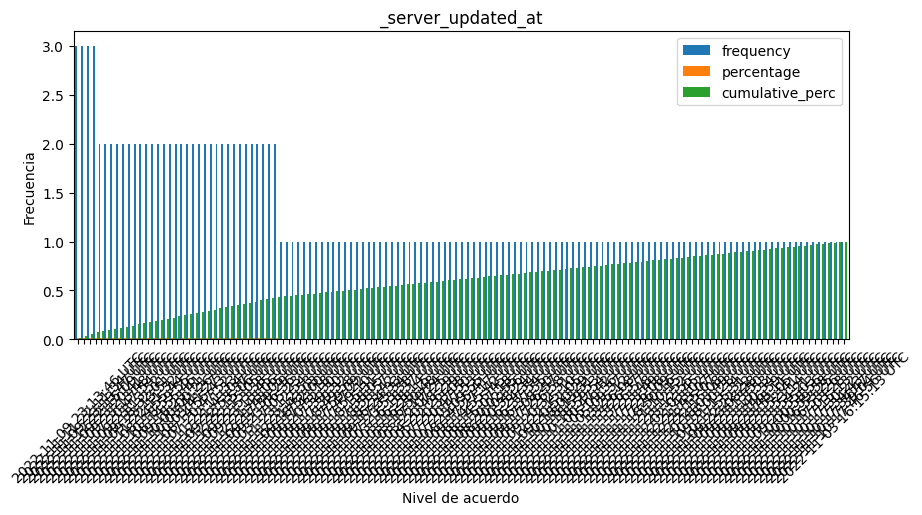

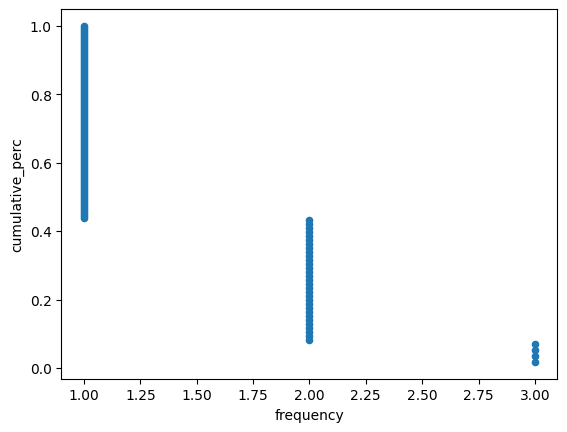

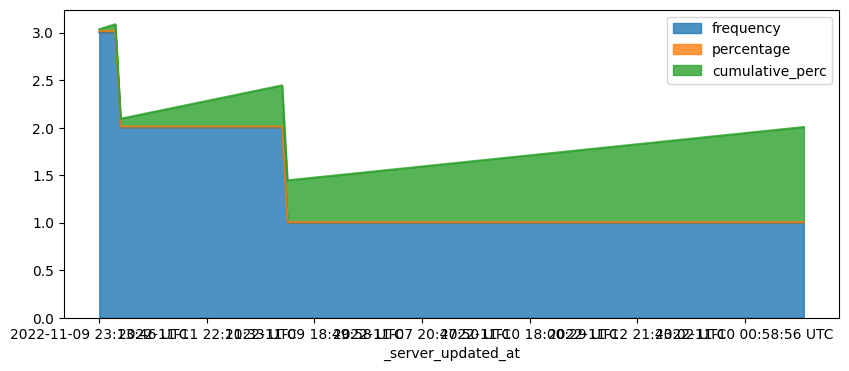

Ejecutando para la variable: 314_reception_delivery_packages
  314_reception_delivery_packages  frequency  percentage  cumulative_perc
0        Totalmente en desacuerdo        149    0.871345         0.871345
1                 Algo de acuerdo          9    0.052632         0.923977
2           Totalmente de acuerdo          8    0.046784         0.970760
3  Ni de acuerdo ni en desacuerdo          3    0.017544         0.988304
4              Algo en desacuerdo          2    0.011696         1.000000


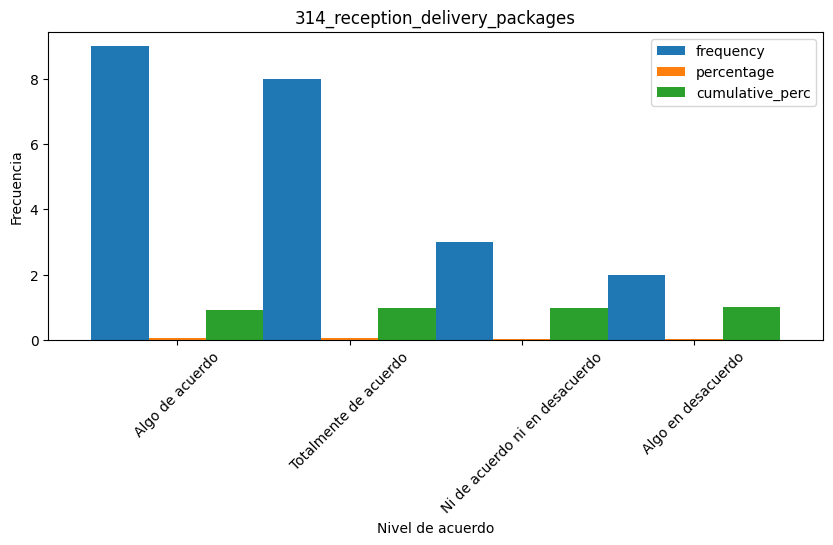

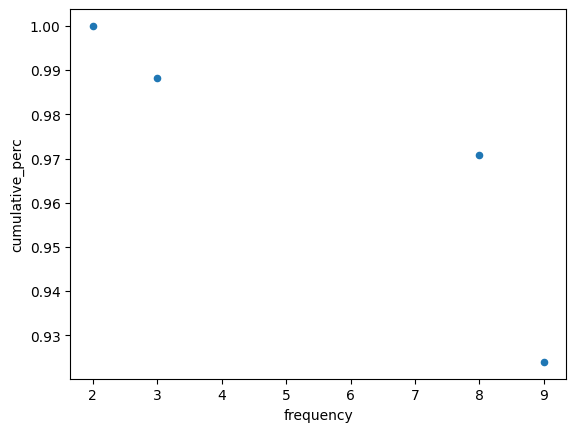

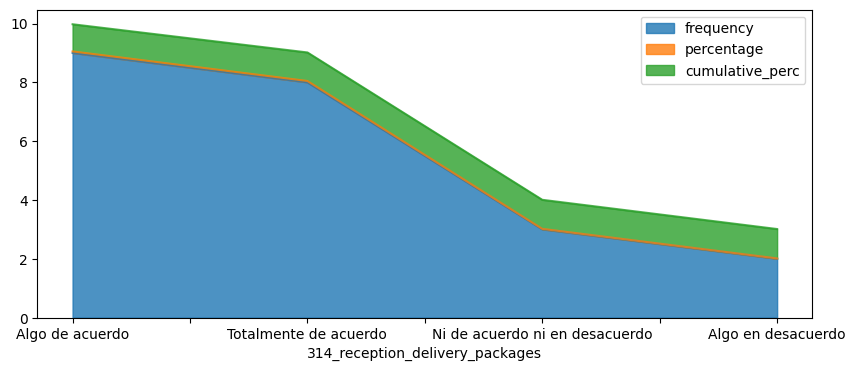

Ejecutando para la variable: 56_procurement_changes_pandemic
  56_procurement_changes_pandemic  frequency  percentage  cumulative_perc
0                              no        145    0.847953         0.847953
1                             yes         26    0.152047         1.000000


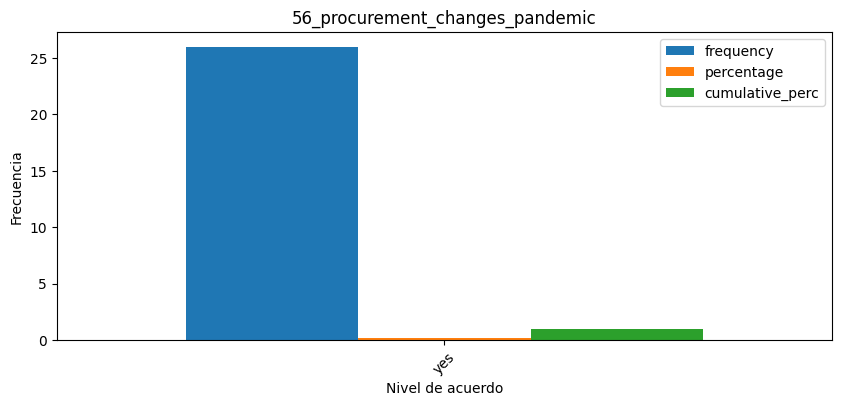

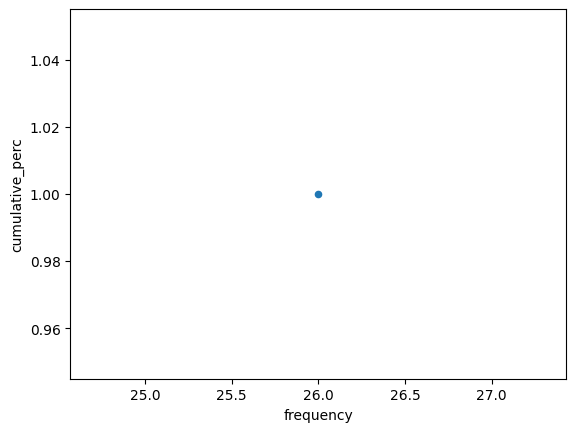

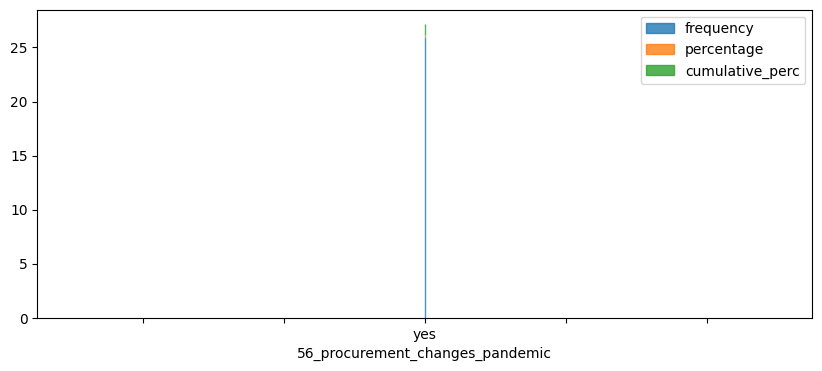

Ejecutando para la variable: 214_customer_relationship_tools
    214_customer_relationship_tools  frequency  percentage  cumulative_perc
0                    Redes sociales        103    0.602339         0.602339
1                  Aplicación móvil         21    0.122807         0.725146
2                           Ninguna         20    0.116959         0.842105
3   Aplicación móvil,Redes sociales         13    0.076023         0.918129
4                          Cuaderno          6    0.035088         0.953216
5                          Teléfono          1    0.005848         0.959064
6           Cuaderno,Redes sociales          1    0.005848         0.964912
7        Aplicación móvil,De frente          1    0.005848         0.970760
8                           Físico           1    0.005848         0.976608
9          Aplicación móvil,Ninguna          1    0.005848         0.982456
10                    publicidades           1    0.005848         0.988304
11                       Pu

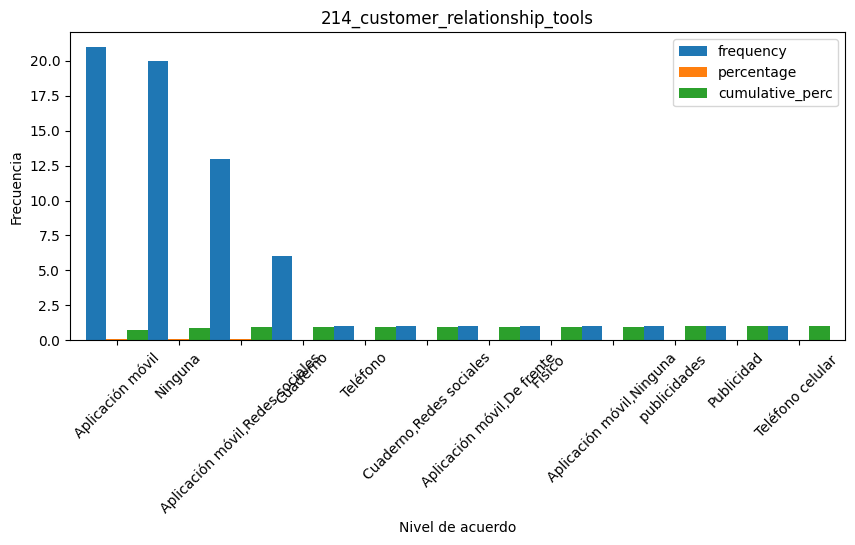

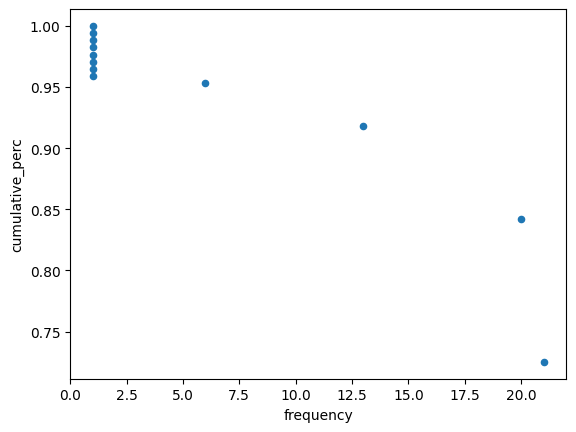

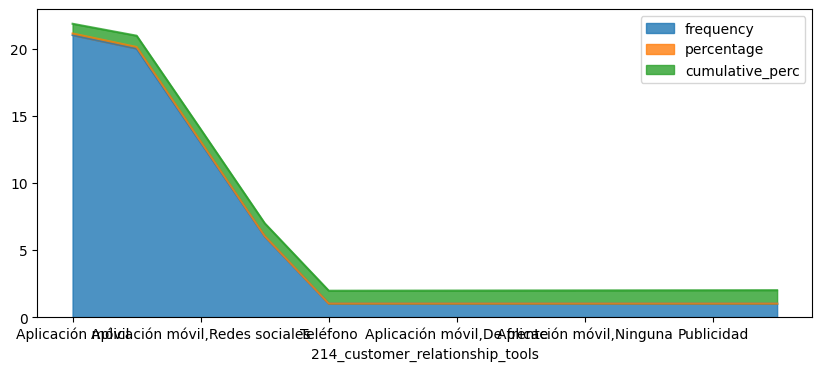

Ejecutando para la variable: 313_home_deliveries
              313_home_deliveries  frequency  percentage  cumulative_perc
0        Totalmente en desacuerdo        138    0.807018         0.807018
1           Totalmente de acuerdo         14    0.081871         0.888889
2                 Algo de acuerdo         11    0.064327         0.953216
3              Algo en desacuerdo          5    0.029240         0.982456
4  Ni de acuerdo ni en desacuerdo          3    0.017544         1.000000


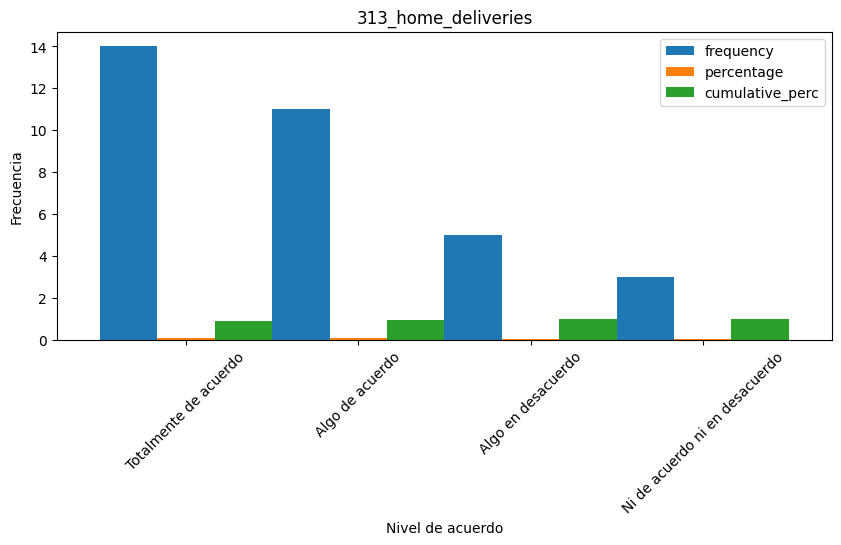

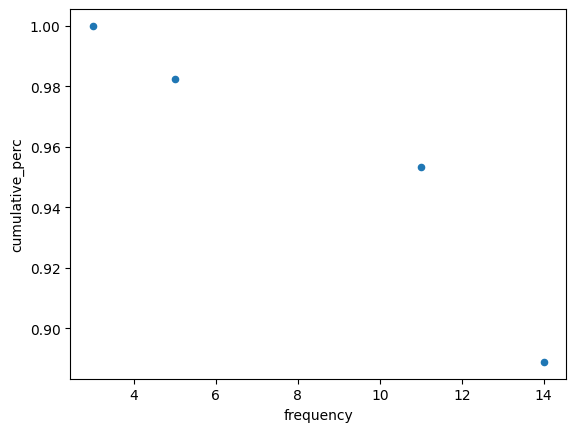

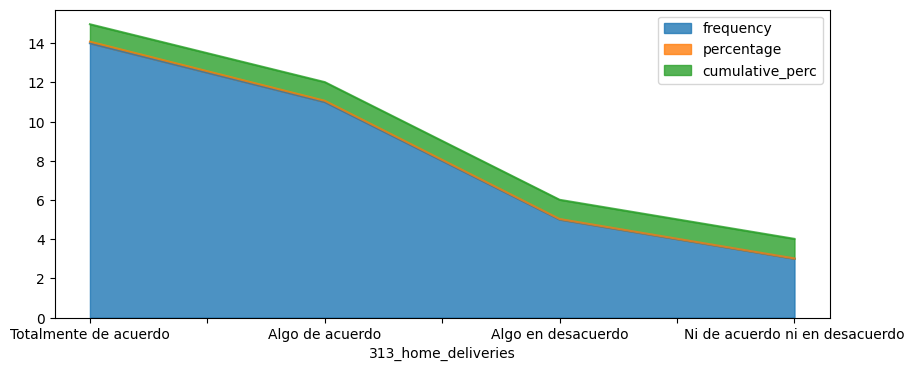

Ejecutando para la variable: 99_does_the_micro_retailer_exhibits_products_outside_
  99_does_the_micro_retailer_exhibits_products_outside_  frequency  \
0                                                 no           120   
1                                                yes            51   

   percentage  cumulative_perc  
0    0.701754         0.701754  
1    0.298246         1.000000  


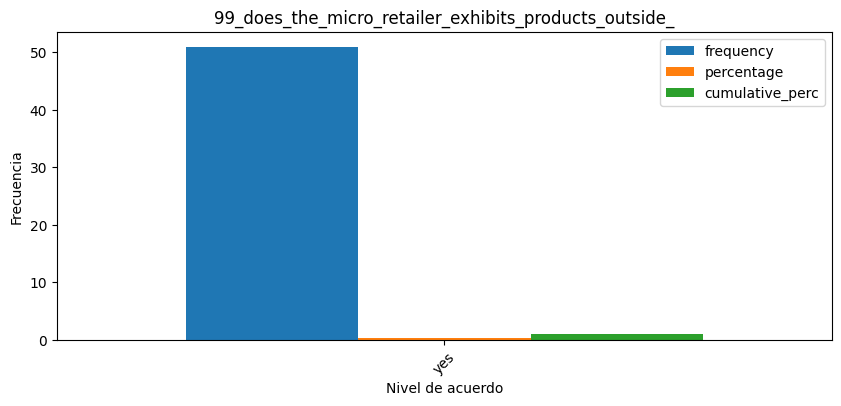

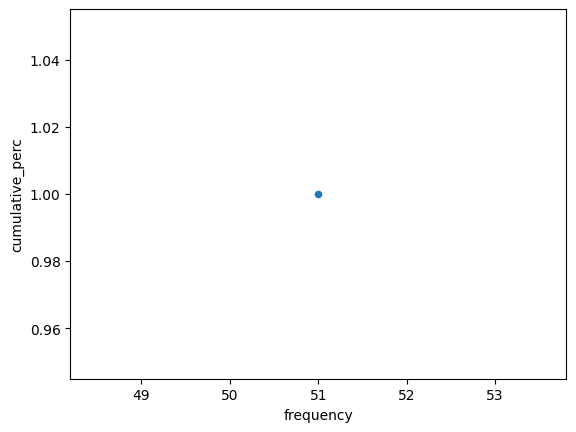

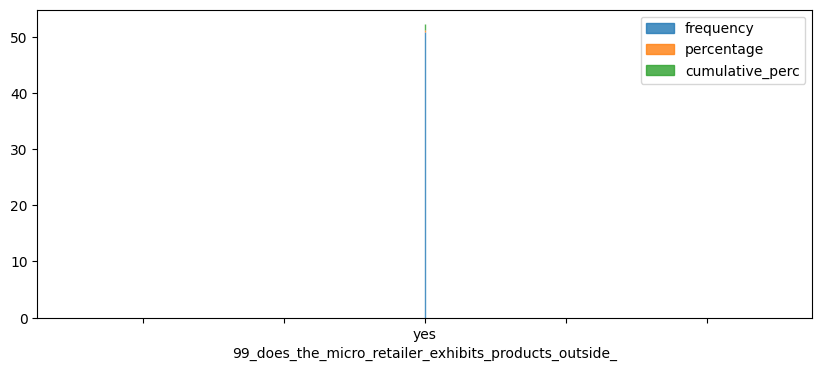

Ejecutando para la variable: 184_store_devices
                                    184_store_devices  frequency  percentage  \
0                                          Smartphone         54    0.315789   
1                                Analog cash register         16    0.093567   
2   POS system (i.e. computer + bar code scanner +...          9    0.052632   
3   POS system (i.e. computer + bar code scanner +...          9    0.052632   
4                     Analog cash register,Smartphone          8    0.046784   
5                         Security cameras,Smartphone          7    0.040936   
6   Dataphone (i.e. card payments),Security camera...          5    0.029240   
7                                    Security cameras          5    0.029240   
8                      Dataphone (i.e. card payments)          4    0.023392   
9   POS system (i.e. computer + bar code scanner +...          4    0.023392   
10              Analog cash register,Security cameras          4    0.023

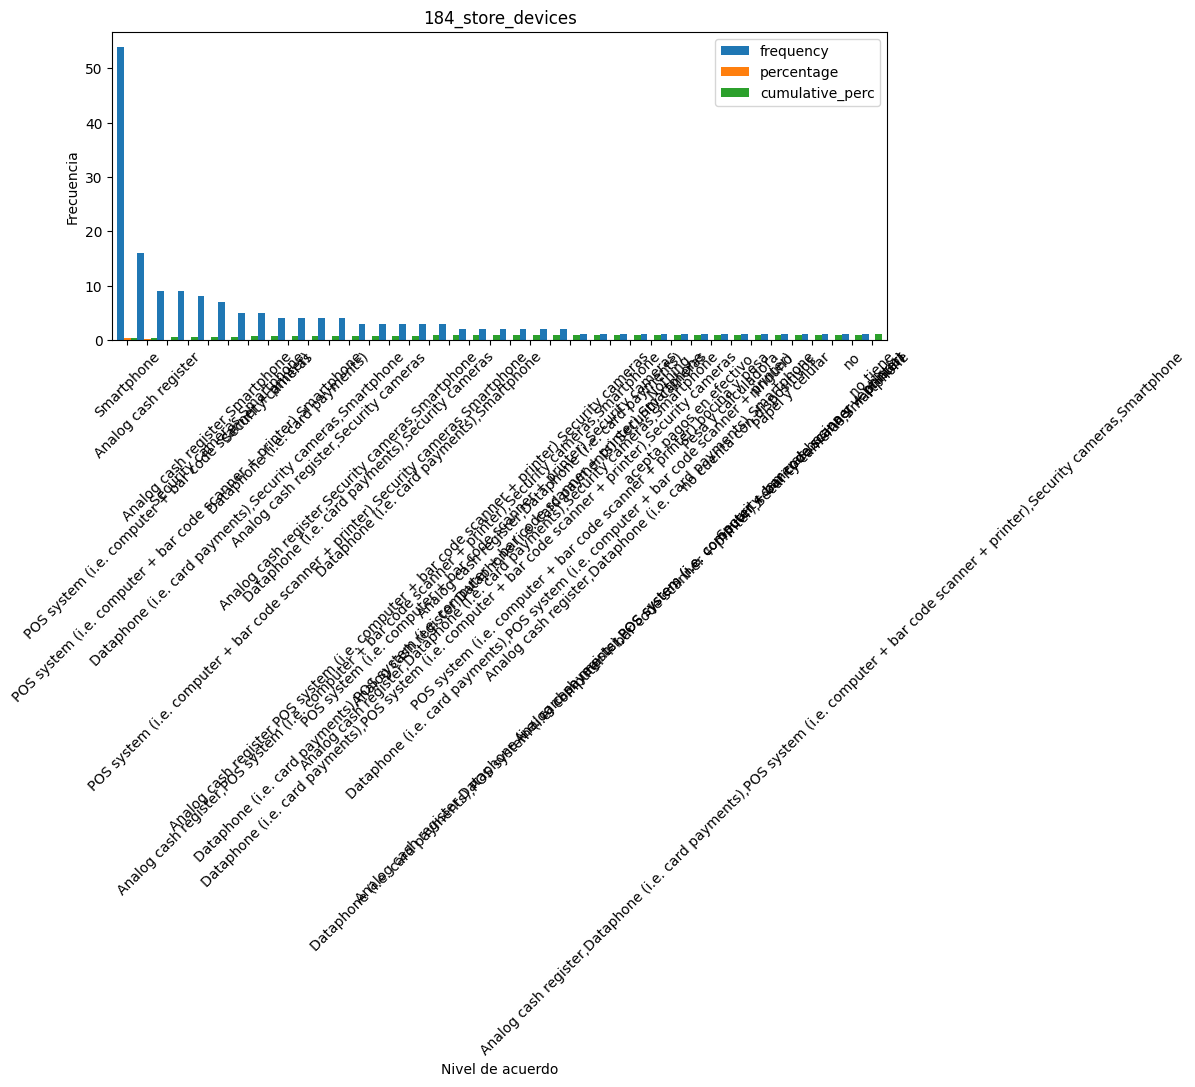

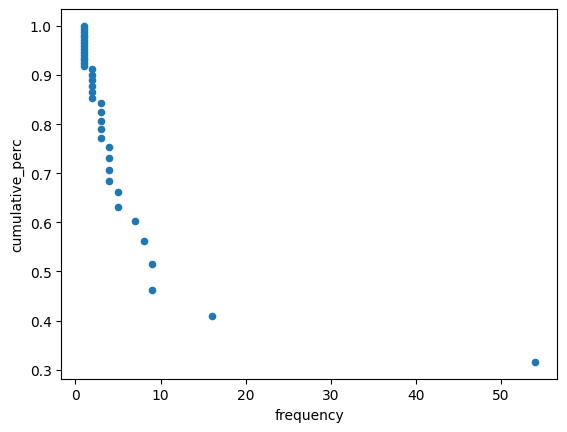

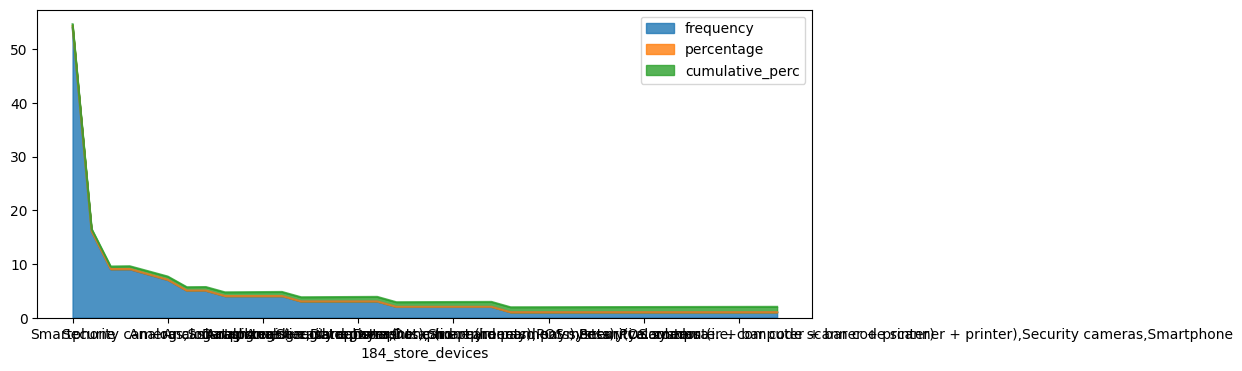

Ejecutando para la variable: 210_sales_channels
                                   210_sales_channels  frequency  percentage  \
0           Redes sociales (e.g. Facebook, Instagram)        100    0.584795   
1                                            WhatsApp         10    0.058480   
2   Redes sociales (e.g. Facebook, Instagram),What...          9    0.052632   
3                             Llamada a Teléfono fijo          6    0.035088   
4                 Llamada a Teléfono celular,WhatsApp          6    0.035088   
5                          Llamada a Teléfono celular          5    0.029240   
6   Llamada a Teléfono celular,Redes sociales (e.g...          5    0.029240   
7   Llamada a Teléfono celular,Llamada a Teléfono ...          3    0.017544   
8                                             Ninguno          3    0.017544   
9                                   Página web propia          3    0.017544   
10  Llamada a Teléfono celular,Llamada a Teléfono ...          2    0.01

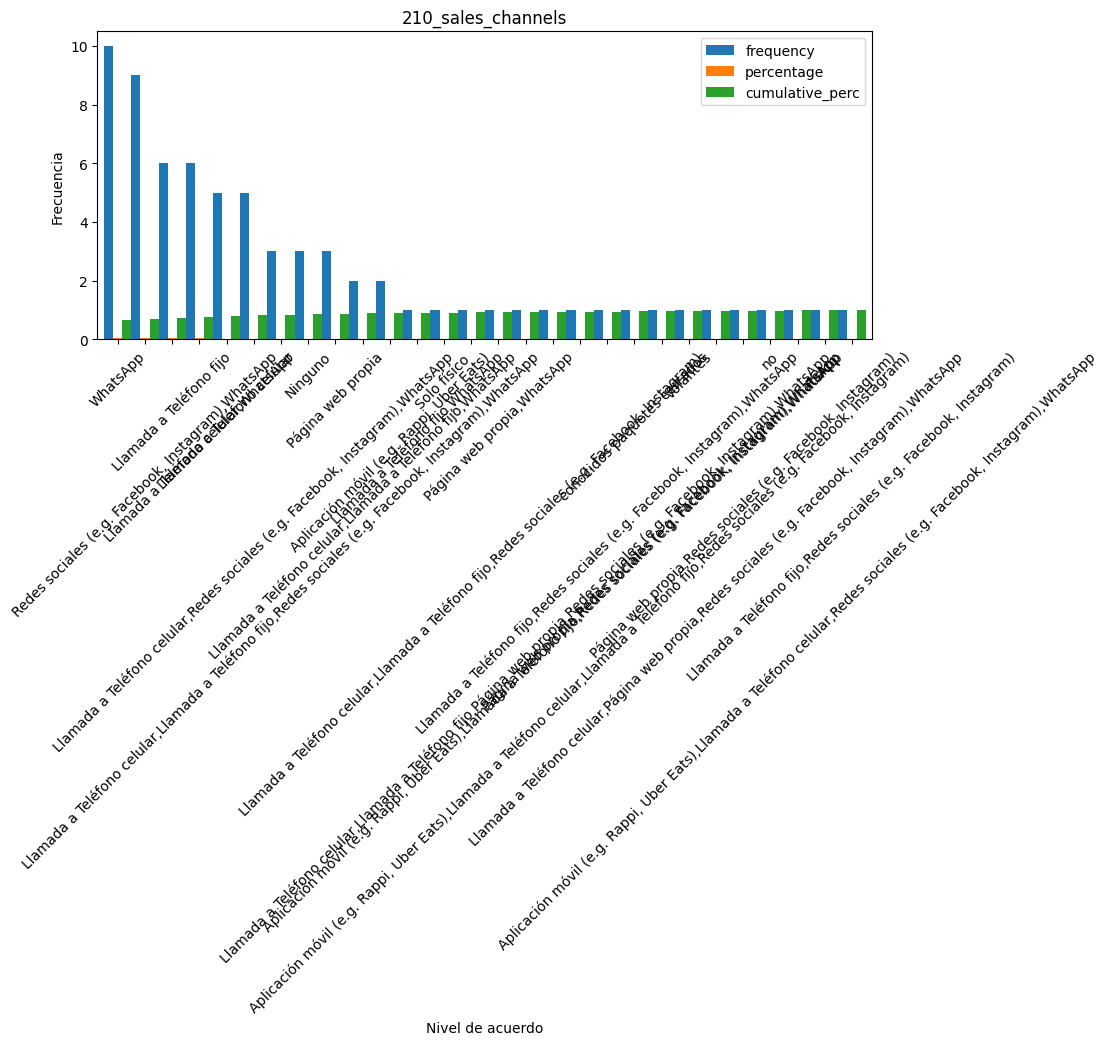

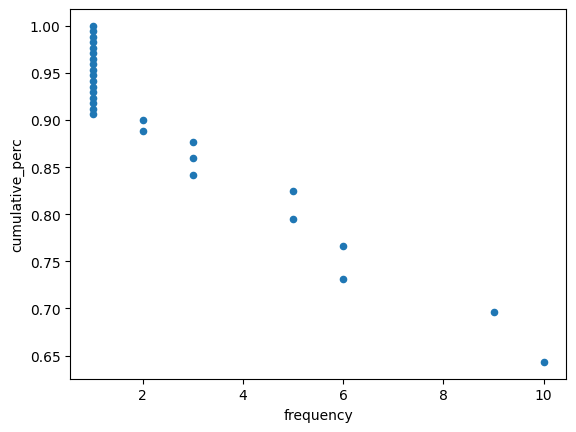

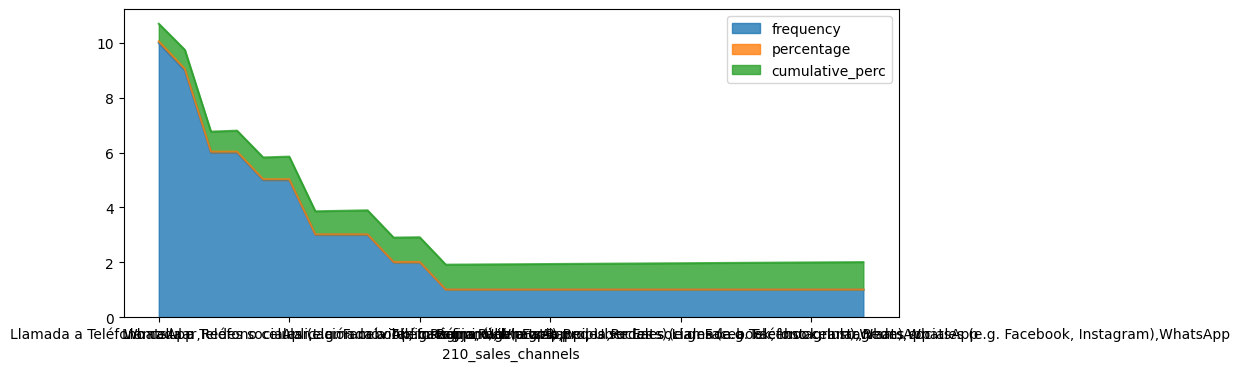

Ejecutando para la variable: 31_different_prices_payment_method
  31_different_prices_payment_method  frequency  percentage  cumulative_perc
0                                 no        169    0.988304         0.988304
1                                yes          2    0.011696         1.000000


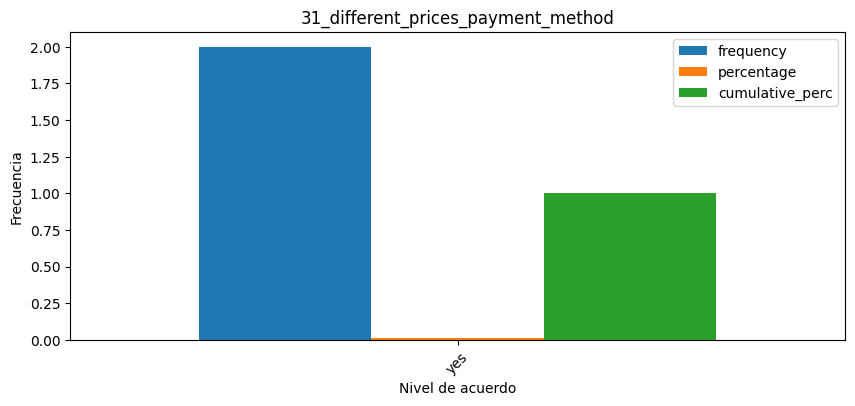

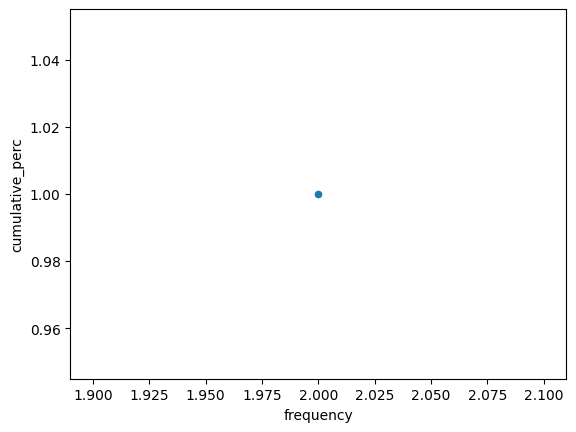

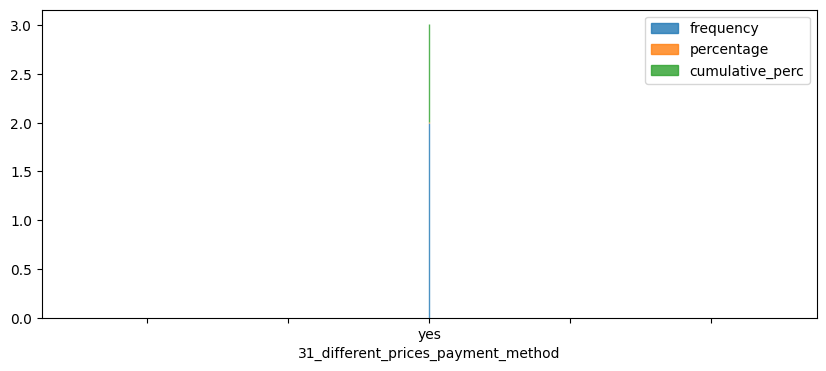

In [30]:
for variable in objects2:
    print("=" * 50)
    print(f"Ejecutando para la variable: {variable}")
    print("=" * 50)

    # Crear una tabla de frecuencia
    table1 = freq_tbl(df[variable])

    # Imprimir la tabla de frecuencia
    print(table1)

    # Filtrar la tabla de frecuencia
    filtro = table1[table1['frequency'] < 100]

    # Ajustar el índice del DataFrame filtrado
    filtro_index = filtro.set_index(variable)

    # Realizar un gráfico de barras del DataFrame filtrado
    filtro_index.plot(kind='bar', width=1, figsize=(10, 4))
    plt.title(variable)
    plt.xlabel('Nivel de acuerdo')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    # Realizar un gráfico de dispersión del DataFrame filtrado
    filtro_index.plot("frequency", "cumulative_perc", kind="scatter")


    # Realizar un gráfico de área del DataFrame filtrado
    filtro_index.plot(kind='area', figsize=(10, 4), alpha=0.8)

    # Mostrar los gráficos
    plt.show()